In [1]:
%load_ext autoreload
%autoreload 2

import tqdm
import _set_path
from pbpi.algo_core.training import evaluations_per_config

In [2]:
ALGO_TYPE = {'original': {'name': 'original', 'exploration': False}
            ,'modified': {'name': 'modified', 'exploration': True} }

---
### 

### Original algorithm

In [3]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 1
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          #, 'init_state_path': './manual_init_state_input/uniformly_sampled_states.csv'
          }

algorithm = ALGO_TYPE['original']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 16


Currently evaluated configs:
 Samples: 1000 | Actions: 6 | Roll-outs: 10 | Significance: 0.1


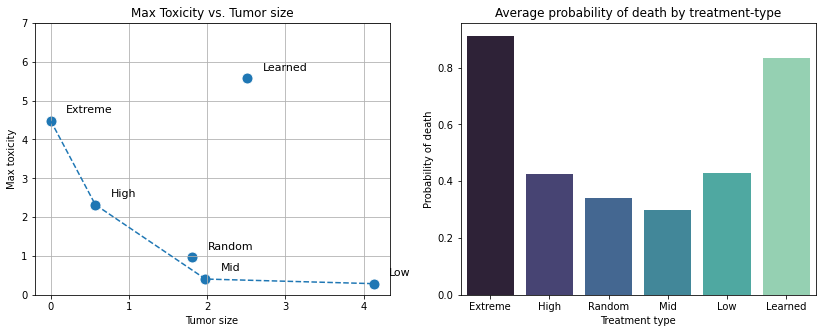

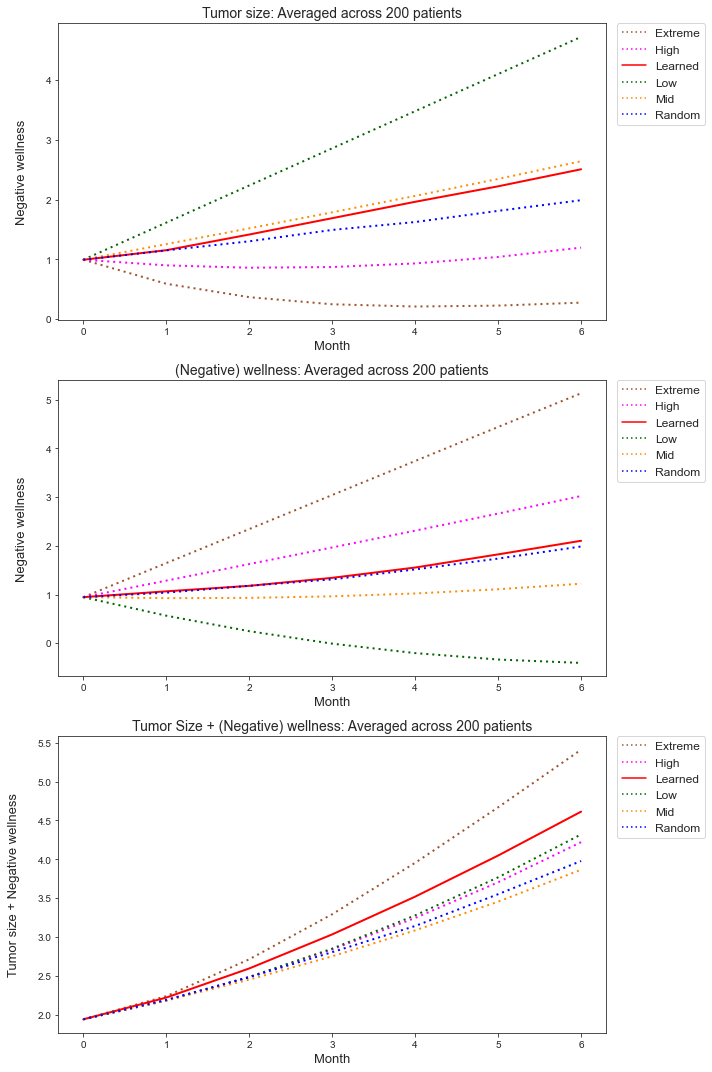


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : 2.5084242042742133
                         - Avg. max. toxicity : 5.575551761677059
                         - Avg. prob. of death : 0.8326818672183515



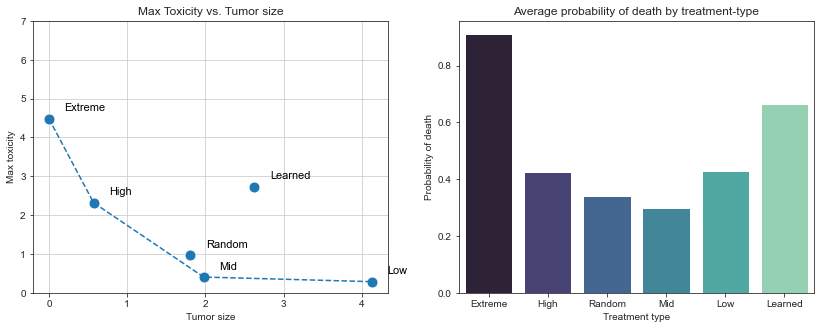

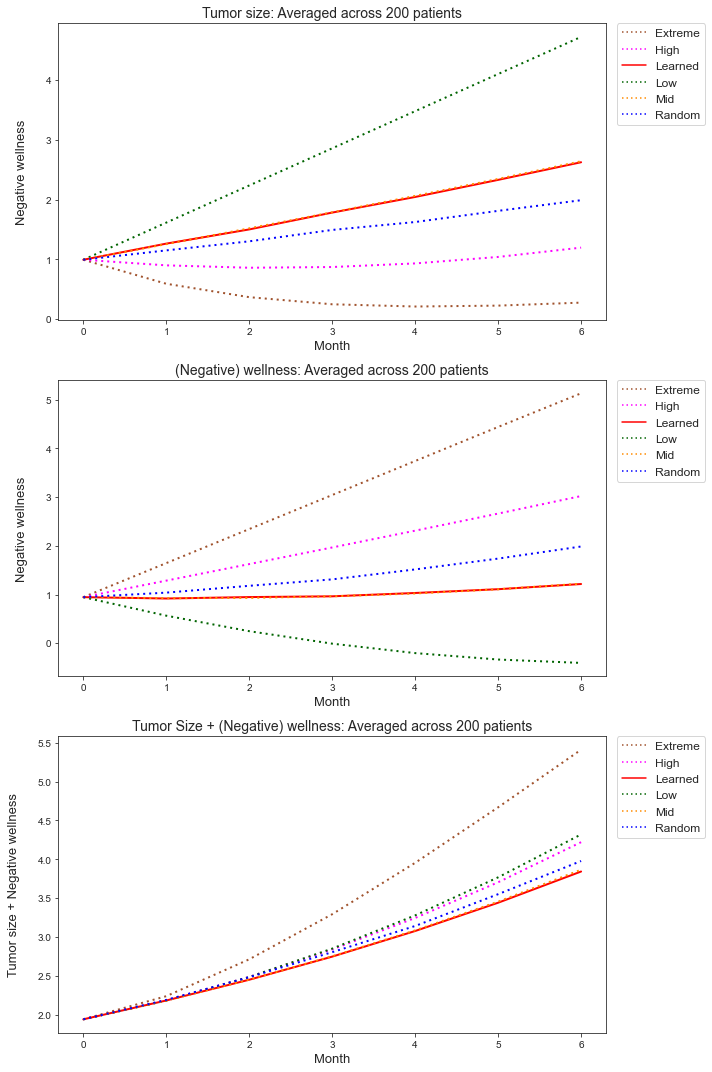


Policy Iteration: 2 - Evaluation results:
                         - Avg. ending tumor size : 2.626051709847654
                         - Avg. max. toxicity : 2.7310282234730816
                         - Avg. prob. of death : 0.6632971329321535



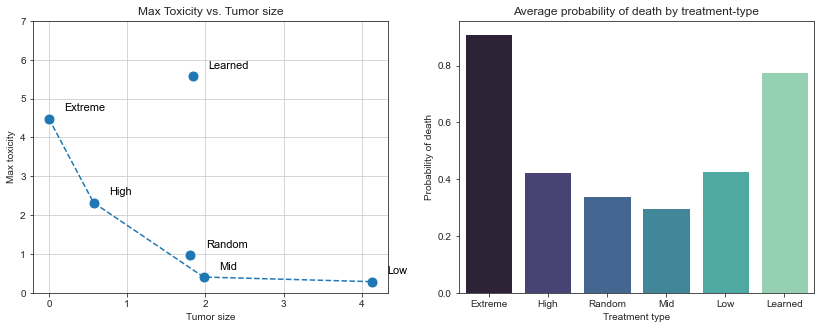

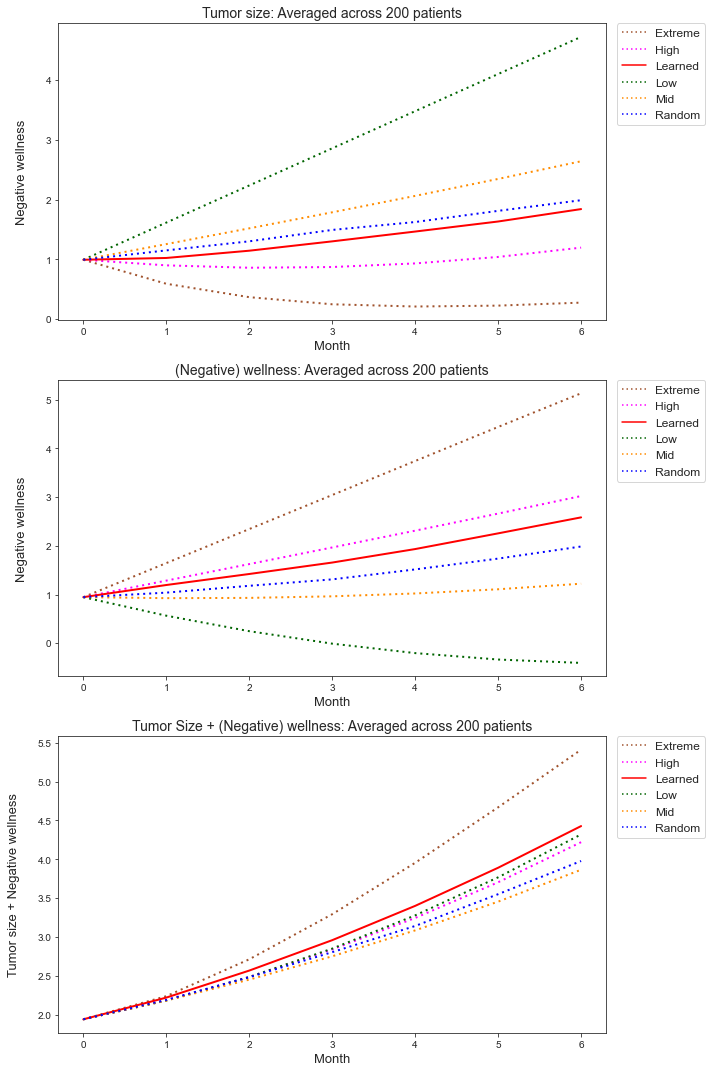


Policy Iteration: 3 - Evaluation results:
                         - Avg. ending tumor size : 1.8417356954642623
                         - Avg. max. toxicity : 5.575551761677059
                         - Avg. prob. of death : 0.7755821708647769



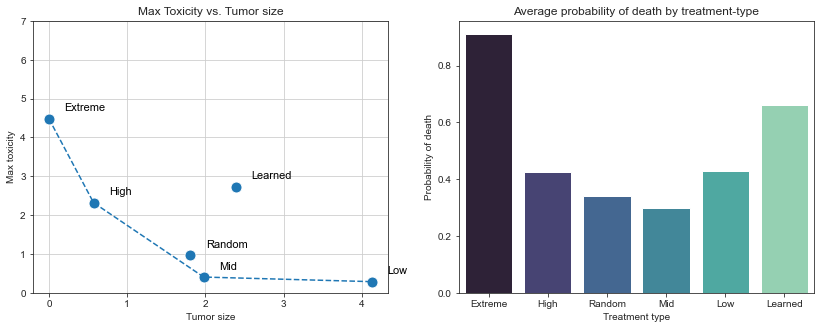

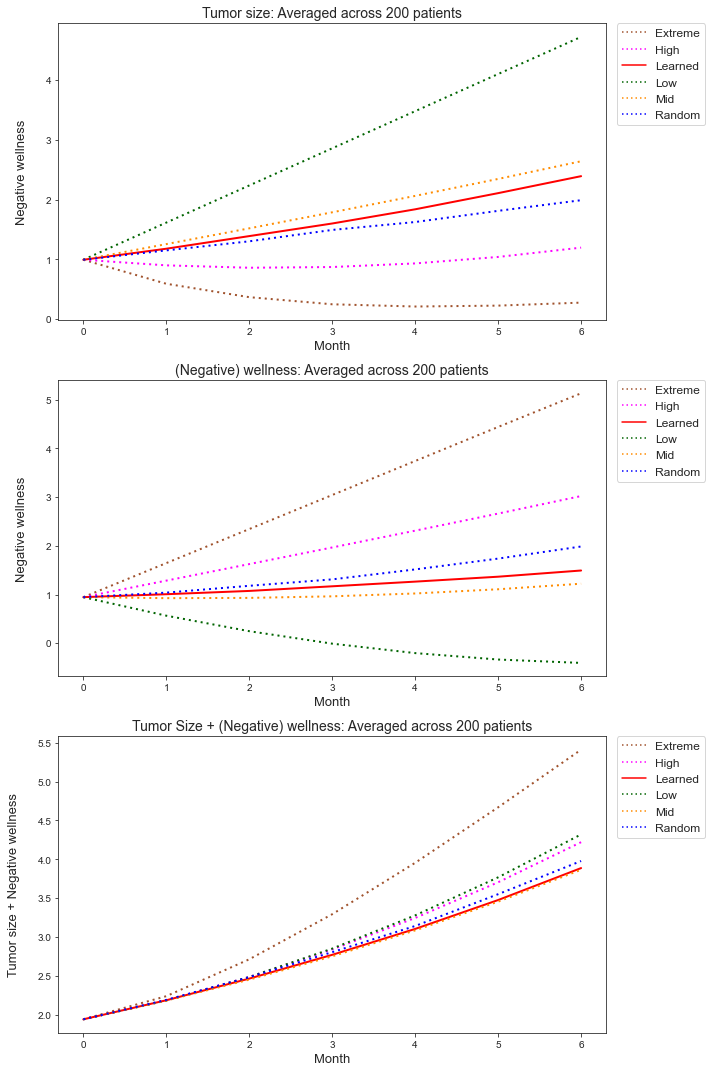


Policy Iteration: 4 - Evaluation results:
                         - Avg. ending tumor size : 2.392889165780734
                         - Avg. max. toxicity : 2.7339489143426747
                         - Avg. prob. of death : 0.6625529327253327



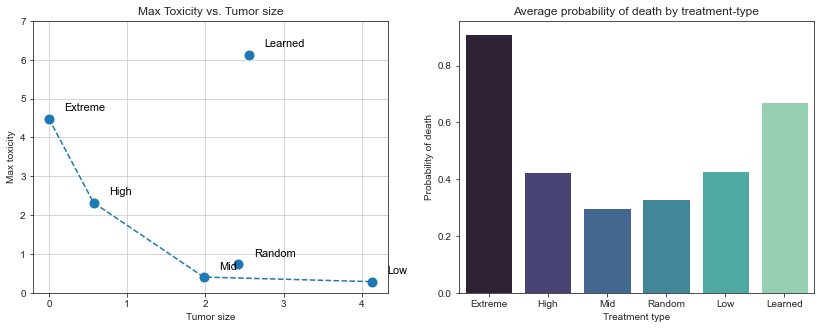

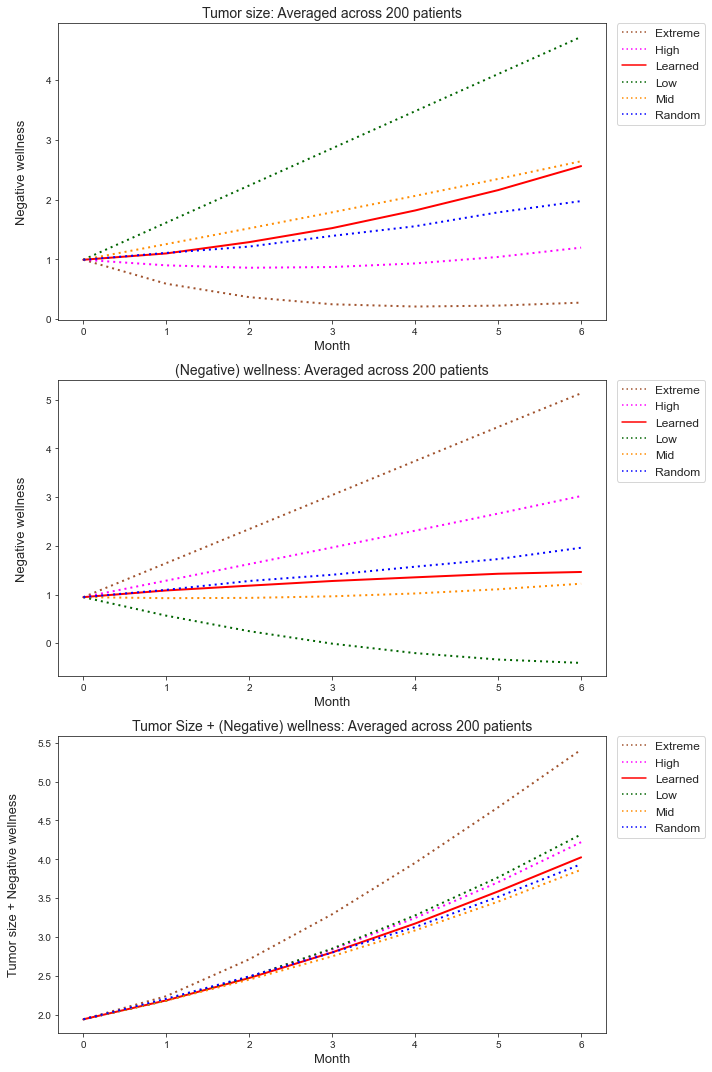


Policy Iteration: 5 - Evaluation results:
                         - Avg. ending tumor size : 2.555804747187684
                         - Avg. max. toxicity : 6.125414643298452
                         - Avg. prob. of death : 0.6703414453409259



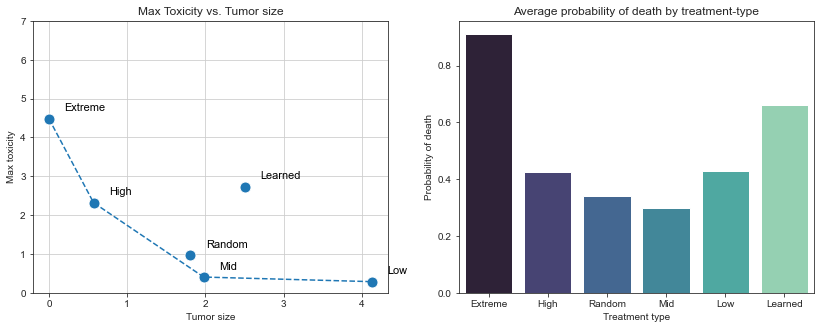

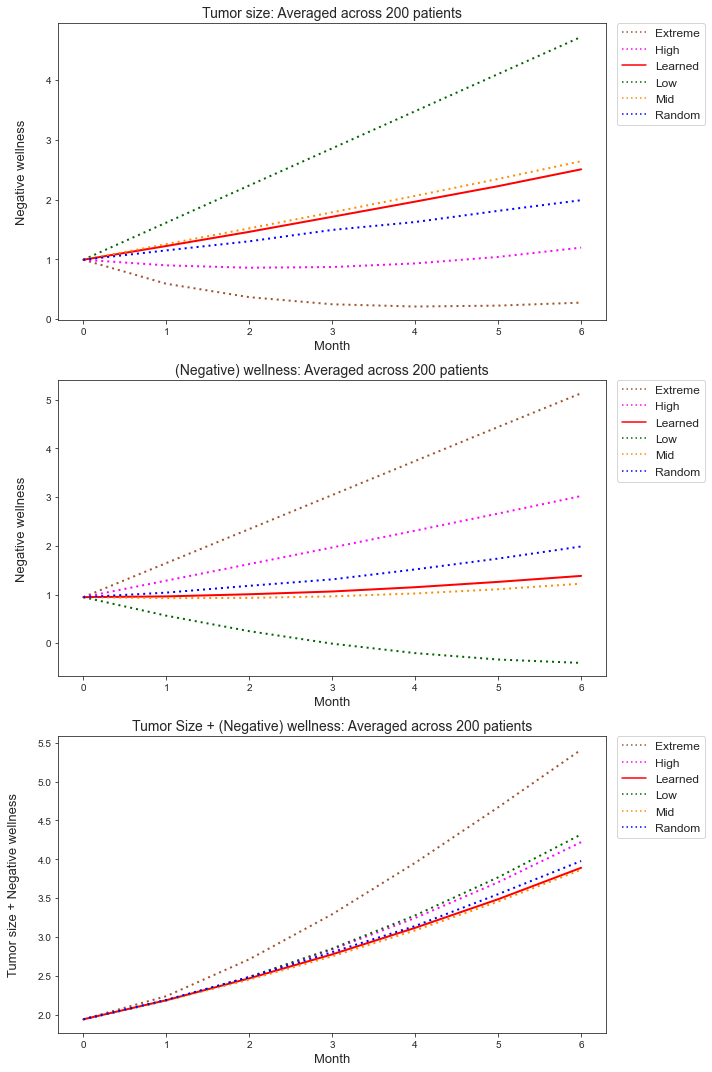


Policy Iteration: 6 - Evaluation results:
                         - Avg. ending tumor size : 2.507351780159114
                         - Avg. max. toxicity : 2.731127519017871
                         - Avg. prob. of death : 0.6607801608415143



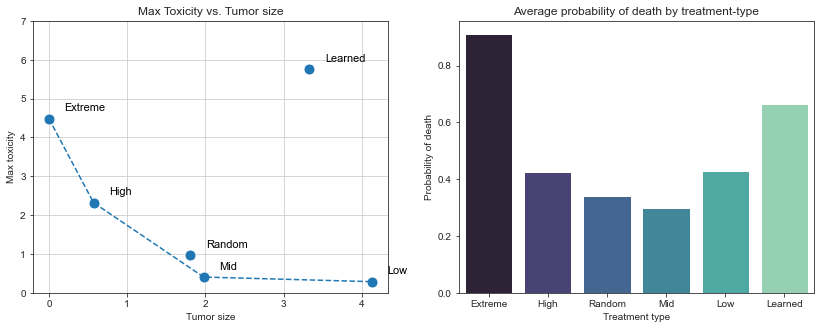

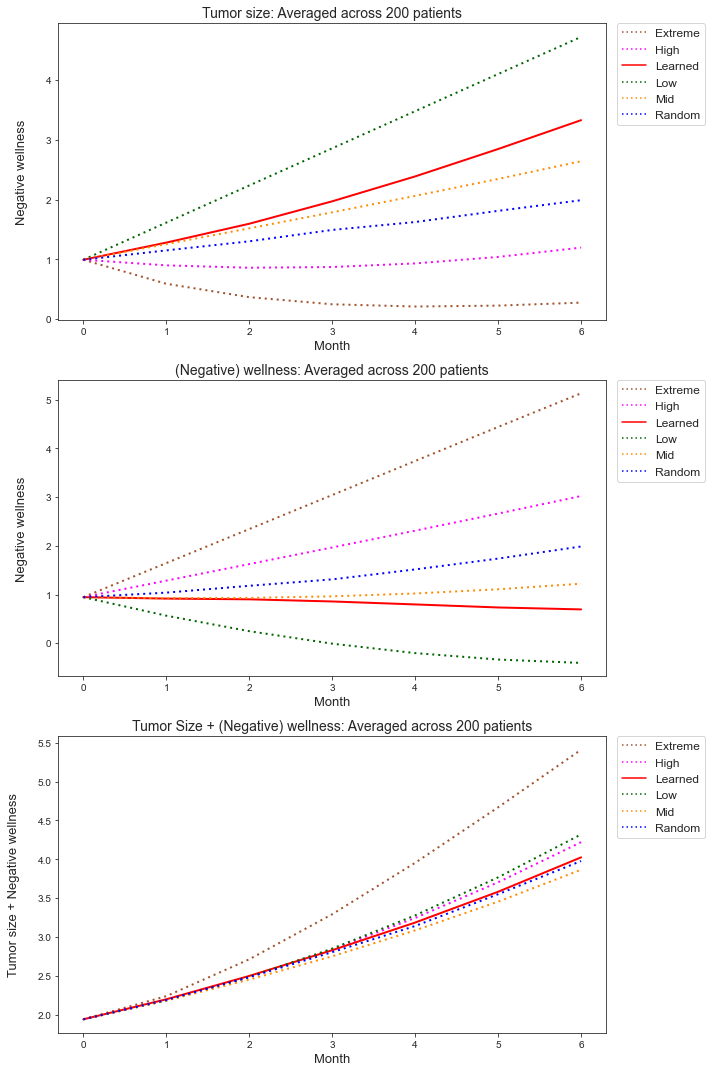


Policy Iteration: 7 - Evaluation results:
                         - Avg. ending tumor size : 3.3301634639565982
                         - Avg. max. toxicity : 5.76246581903871
                         - Avg. prob. of death : 0.6644005911143424



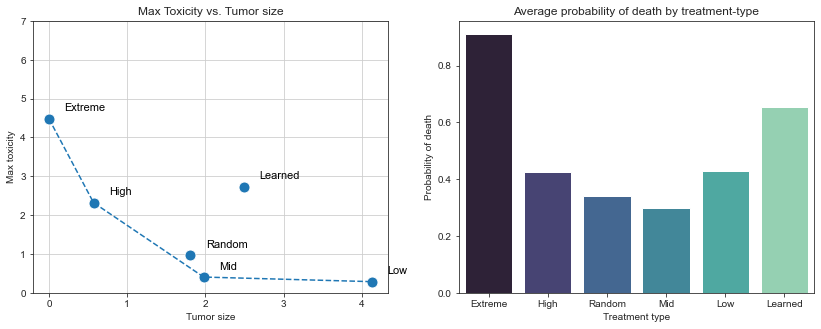

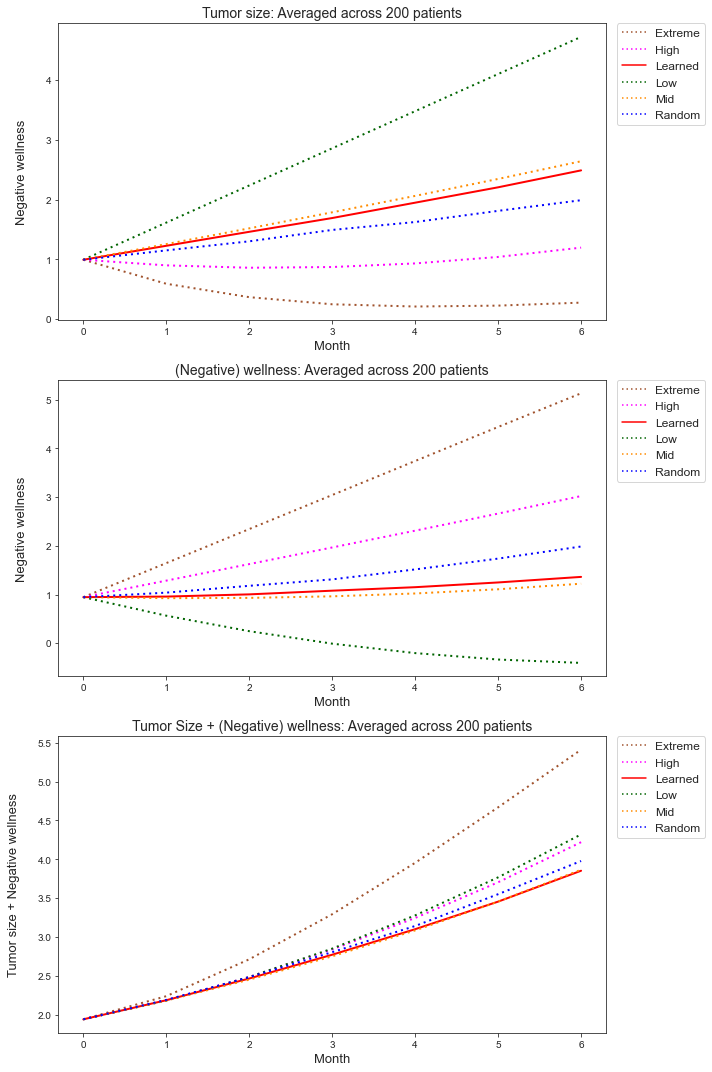


Policy Iteration: 8 - Evaluation results:
                         - Avg. ending tumor size : 2.4898438169656227
                         - Avg. max. toxicity : 2.731127519017871
                         - Avg. prob. of death : 0.653525423011978



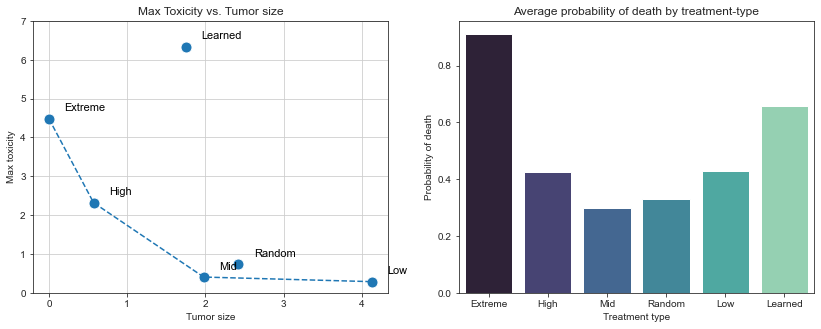

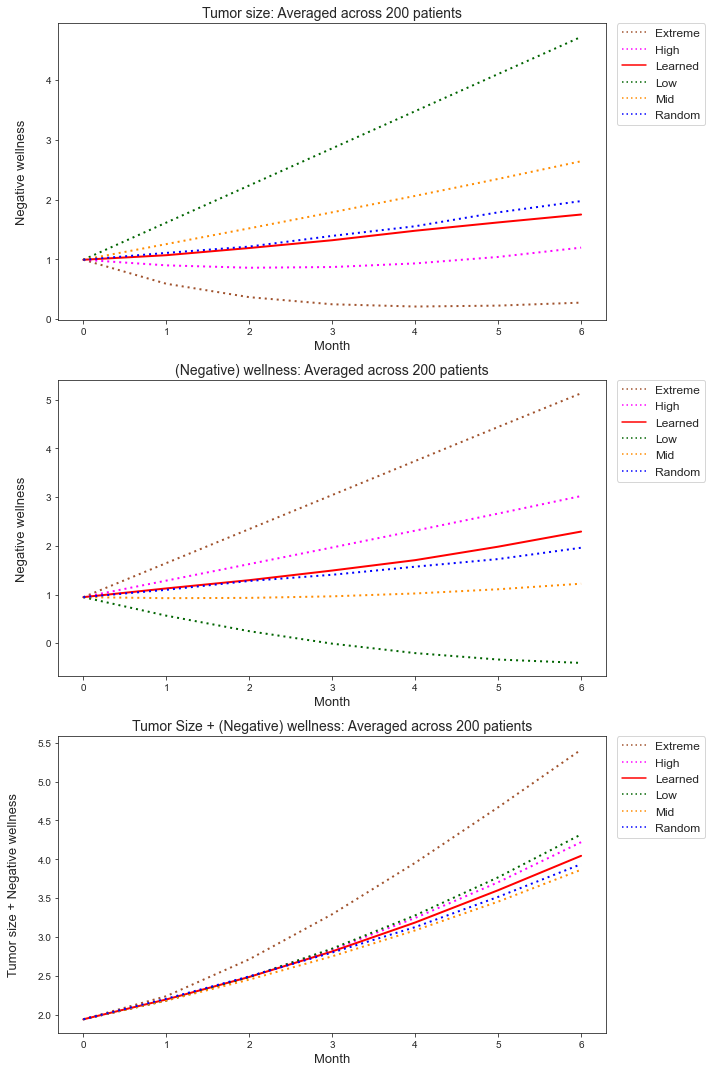


Policy Iteration: 9 - Evaluation results:
                         - Avg. ending tumor size : 1.7493271320049244
                         - Avg. max. toxicity : 6.331772249730725
                         - Avg. prob. of death : 0.6558305345161807



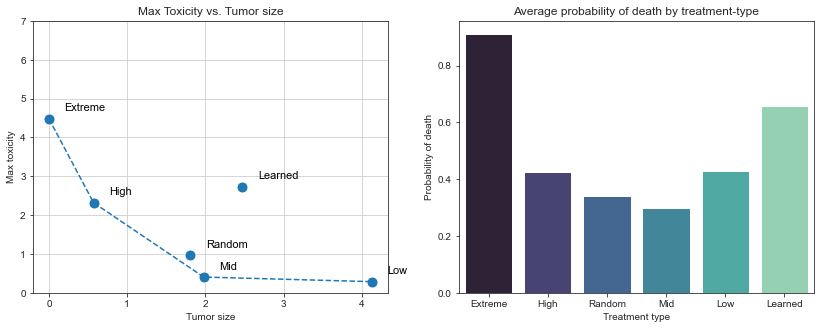

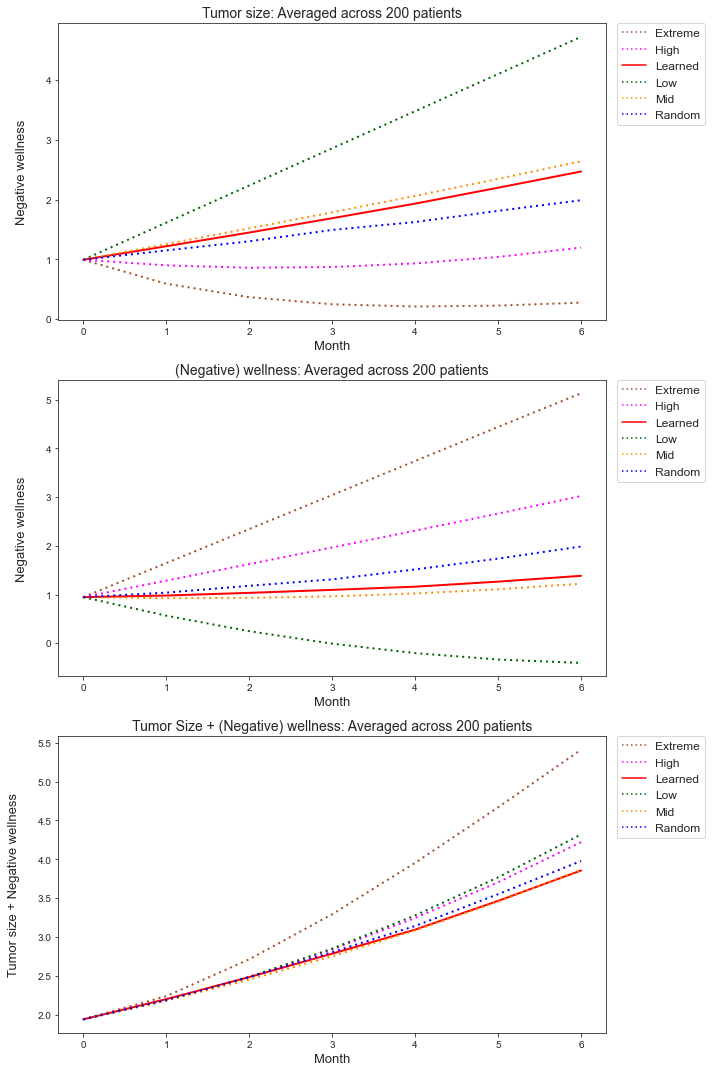


Evaluations: 100%|██████████| 1/1 [1:44:11<00:00, 6251.66s/it]
Policy Iteration: 10 - Evaluation results:
                         - Avg. ending tumor size : 2.4708223525084376
                         - Avg. max. toxicity : 2.7325837038955036
                         - Avg. prob. of death : 0.6579482773744162




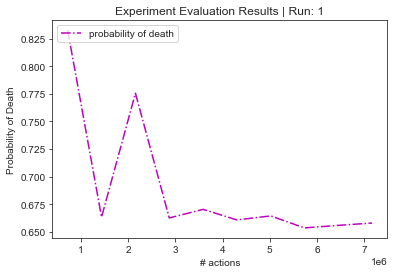

In [4]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                #, init_state_path            = configs['init_state_path'] # Use a pre-designed init state configs   
                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 6
                                                , treatment_length_eval     = 6
                                                
                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show SR vs. action no. plot of exp. run

                                                , set_seed = 16
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

### Modified algorithm

In [5]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 1
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          #, 'init_state_path': './manual_init_state_input/uniformly_sampled_states.csv'
          }

algorithm = ALGO_TYPE['modified']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 16


Currently evaluated configs:
 Samples: 1000 | Actions: 6 | Roll-outs: 10 | Significance: 0.1


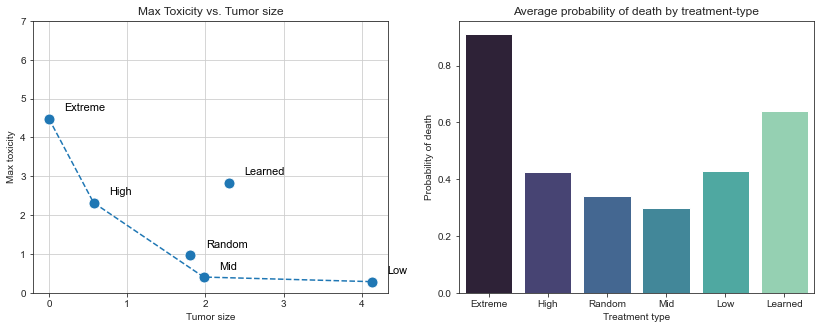

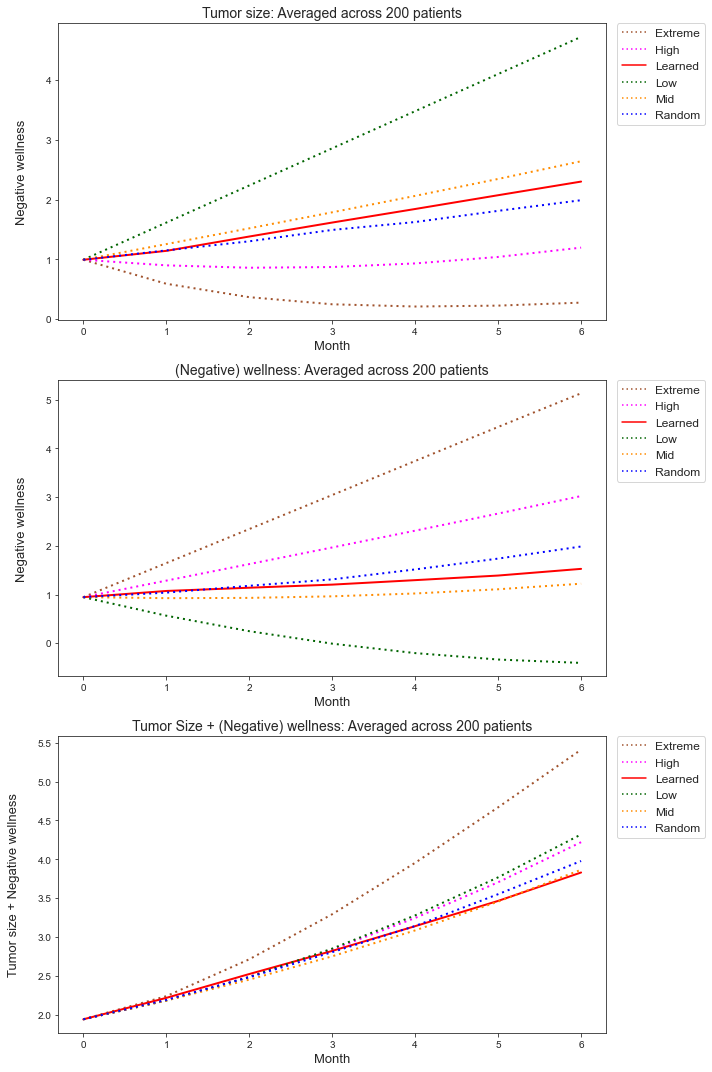


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : 2.302211437447923
                         - Avg. max. toxicity : 2.827679294856851
                         - Avg. prob. of death : 0.6392654929060594



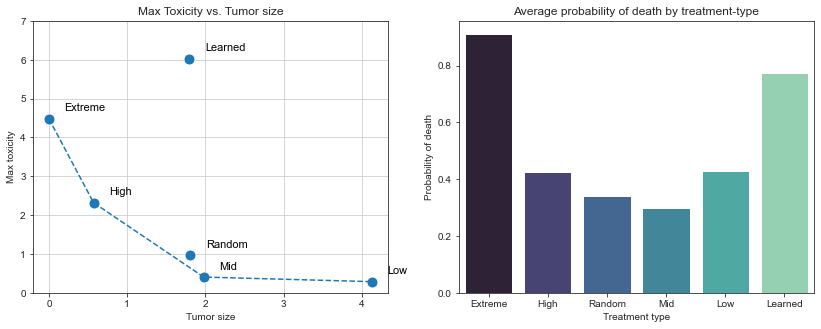

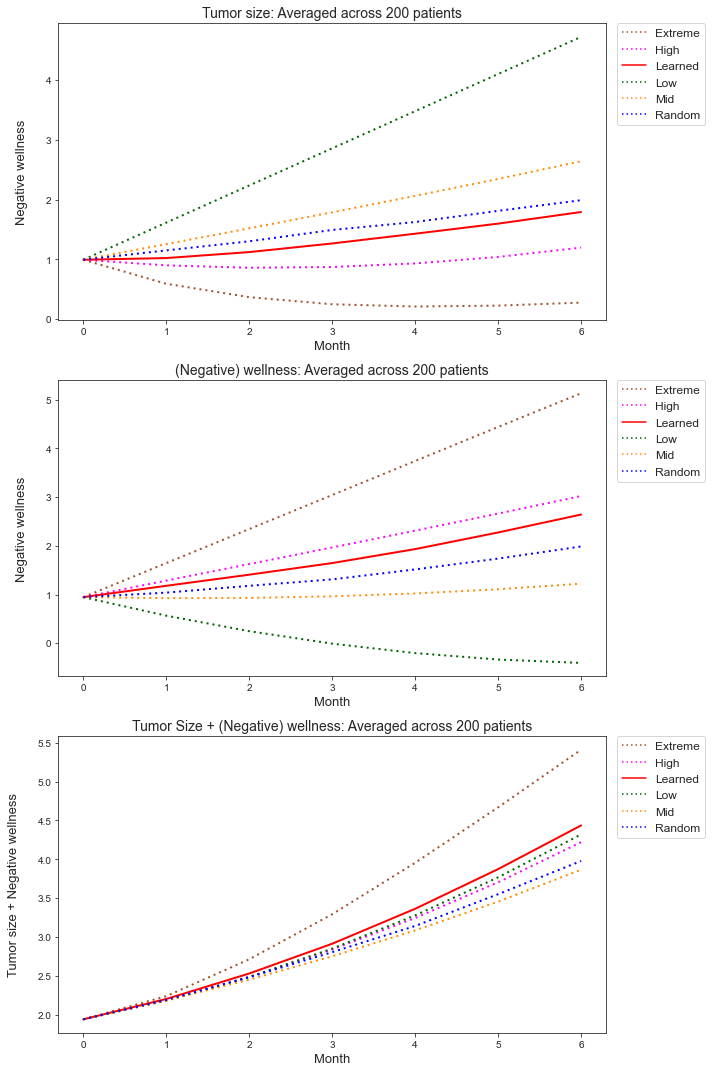


Policy Iteration: 2 - Evaluation results:
                         - Avg. ending tumor size : 1.792466759123134
                         - Avg. max. toxicity : 6.025911793621194
                         - Avg. prob. of death : 0.7754003079131756



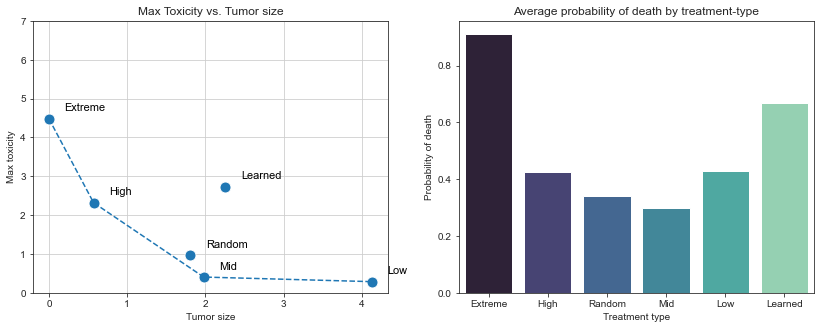

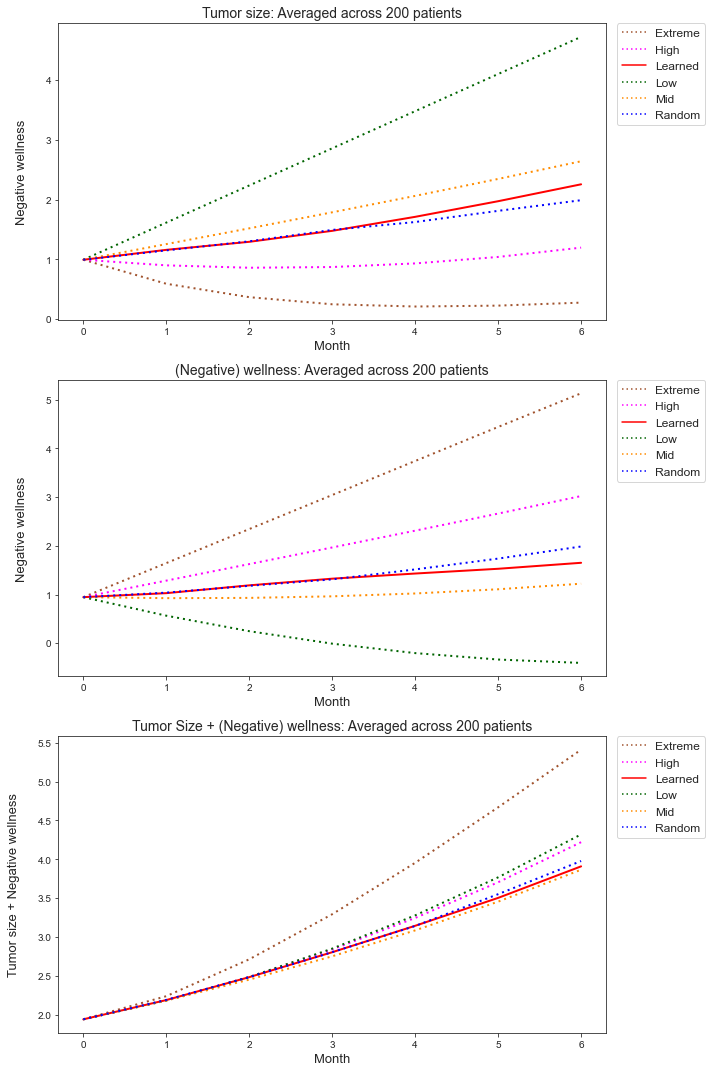


Policy Iteration: 3 - Evaluation results:
                         - Avg. ending tumor size : 2.25658169733329
                         - Avg. max. toxicity : 2.7368689363308687
                         - Avg. prob. of death : 0.6690798708254484



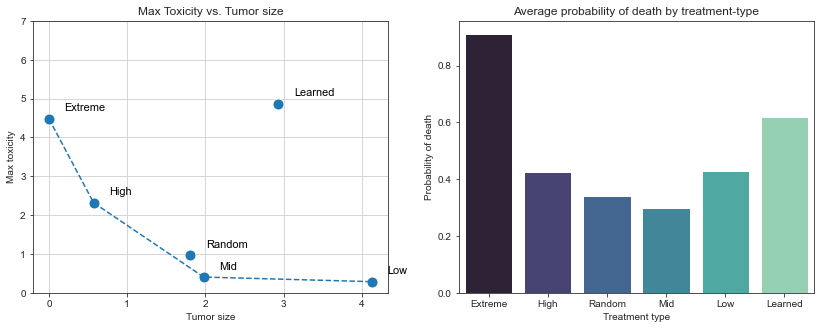

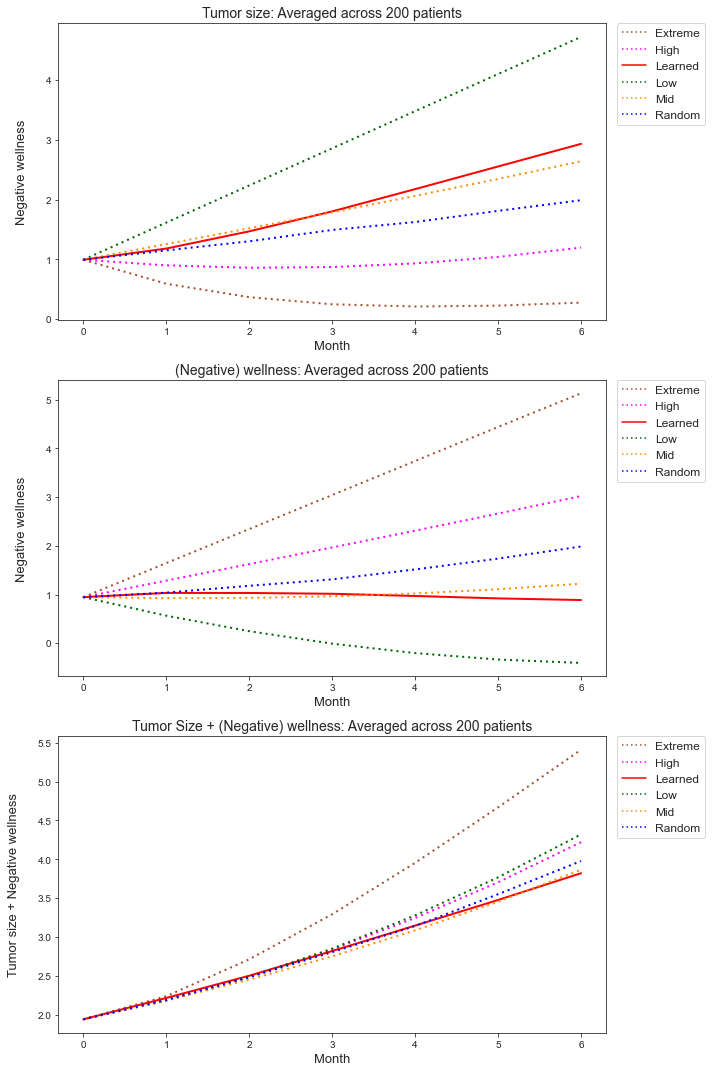


Policy Iteration: 4 - Evaluation results:
                         - Avg. ending tumor size : 2.9336913977580497
                         - Avg. max. toxicity : 4.8719952894796
                         - Avg. prob. of death : 0.6172679363428152



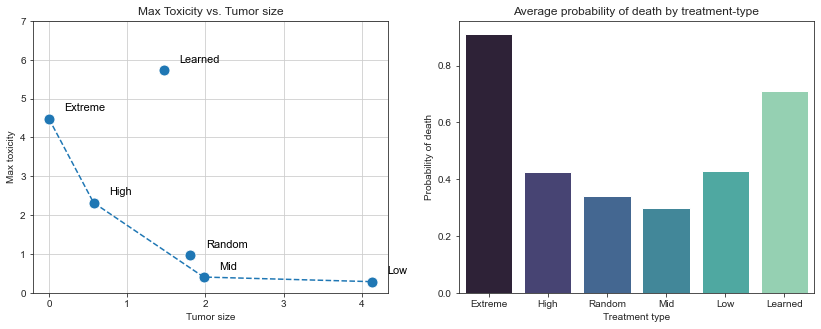

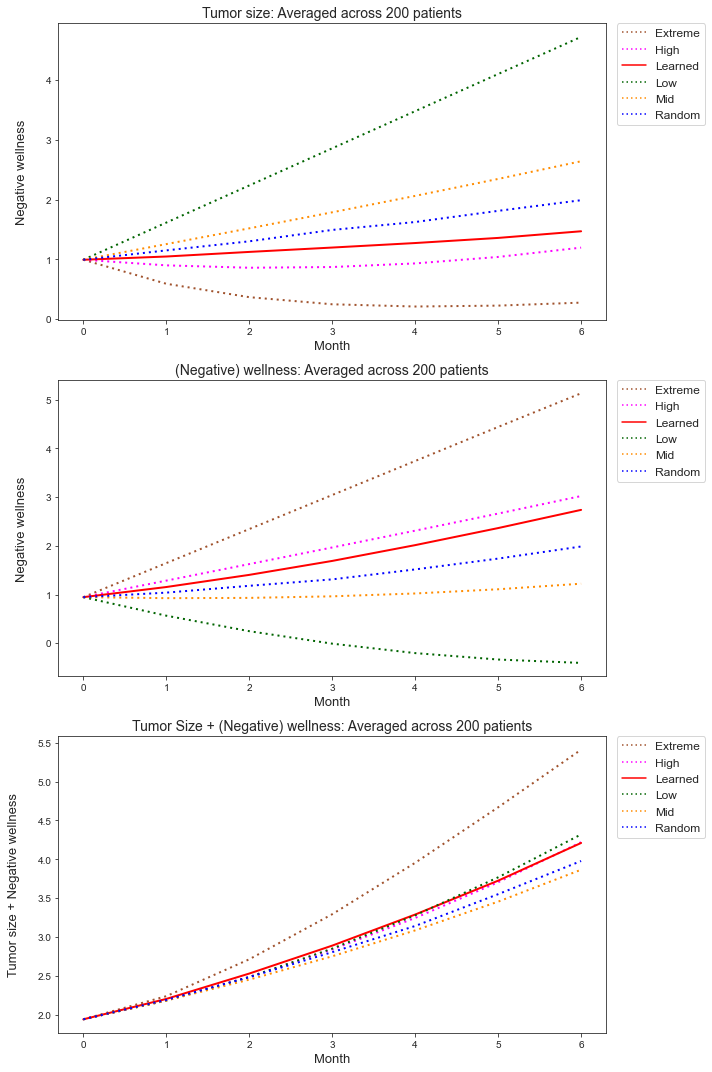


Policy Iteration: 5 - Evaluation results:
                         - Avg. ending tumor size : 1.4703809846944844
                         - Avg. max. toxicity : 5.731334488431698
                         - Avg. prob. of death : 0.7088235414754304



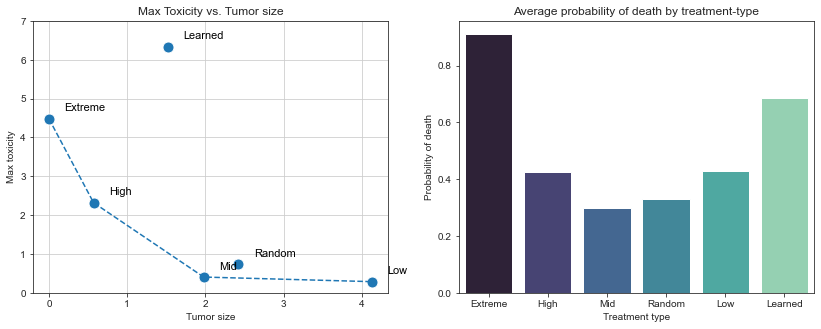

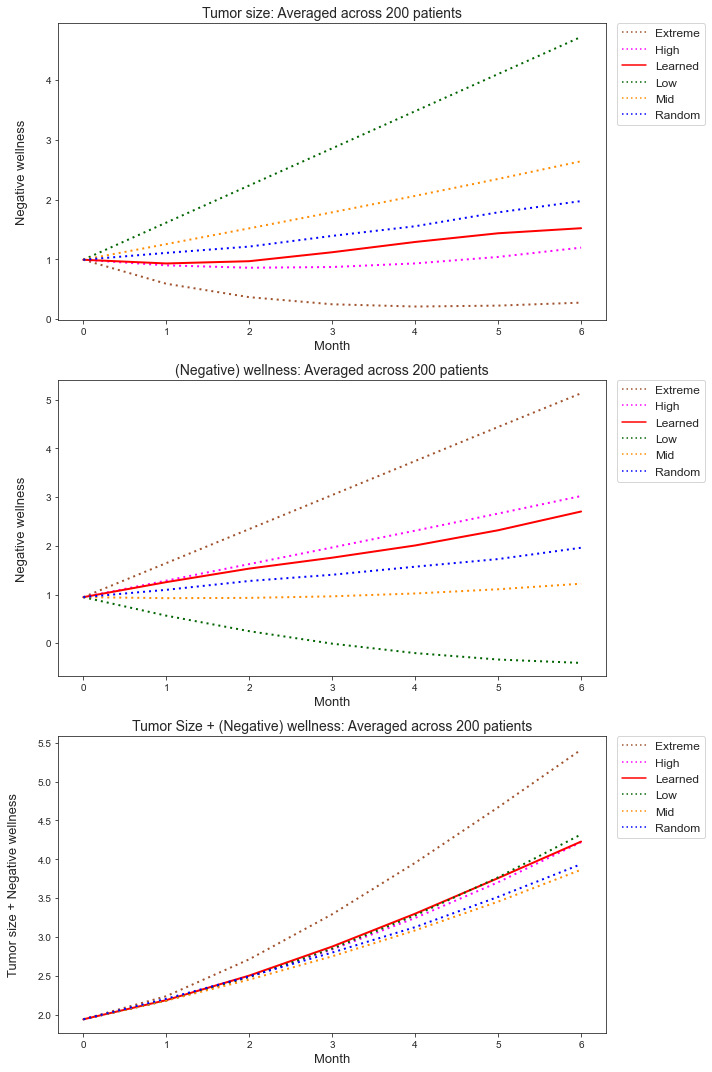


Policy Iteration: 6 - Evaluation results:
                         - Avg. ending tumor size : 1.5214651922958364
                         - Avg. max. toxicity : 6.3331955408098795
                         - Avg. prob. of death : 0.6868121077083758



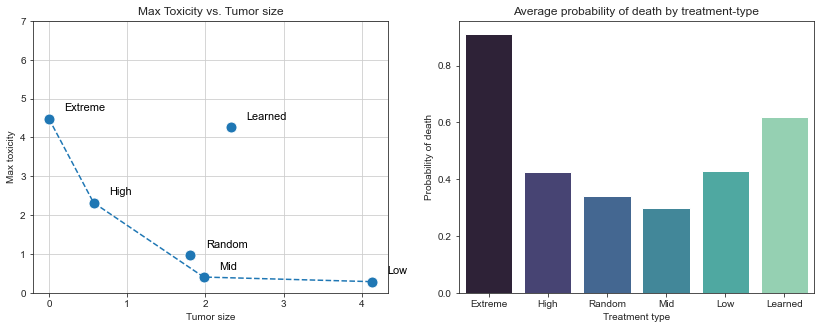

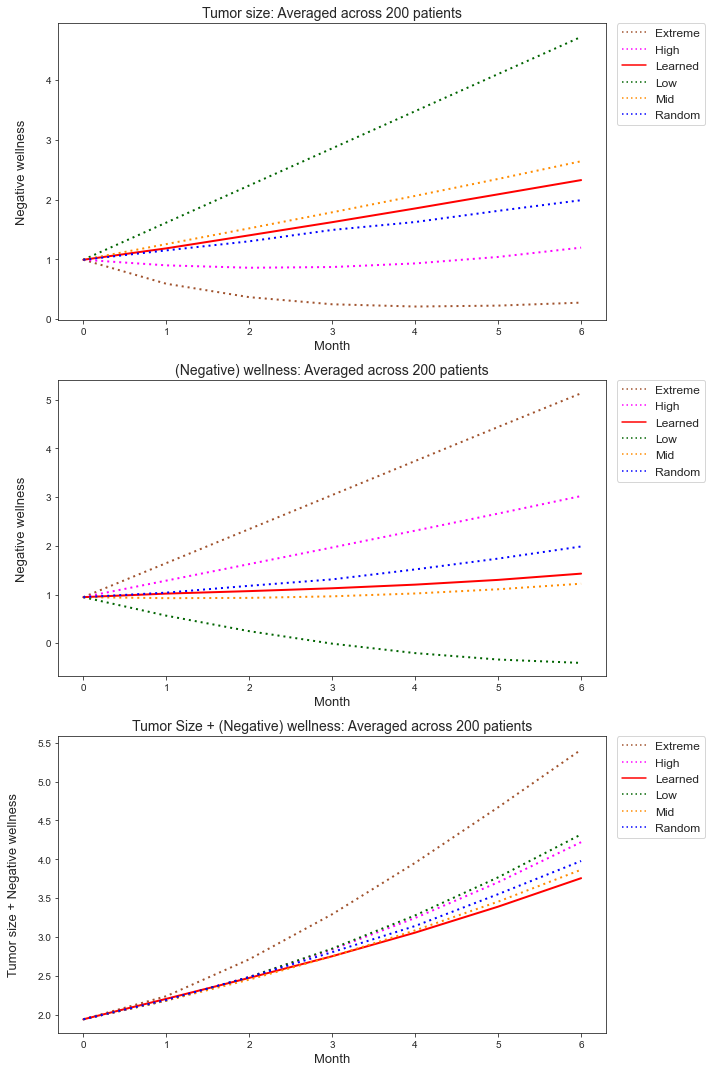


Policy Iteration: 7 - Evaluation results:
                         - Avg. ending tumor size : 2.327140409890207
                         - Avg. max. toxicity : 4.268252955297944
                         - Avg. prob. of death : 0.6186984930661633



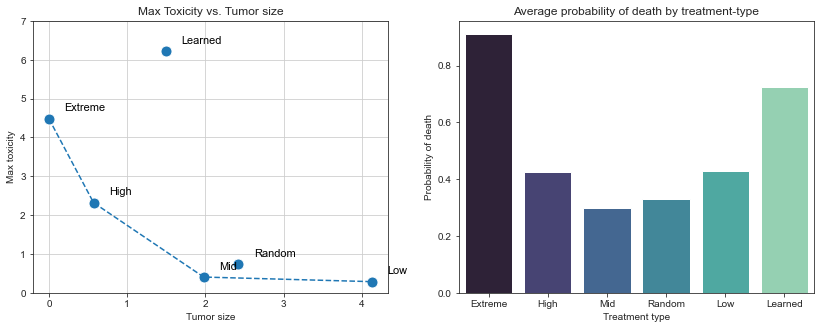

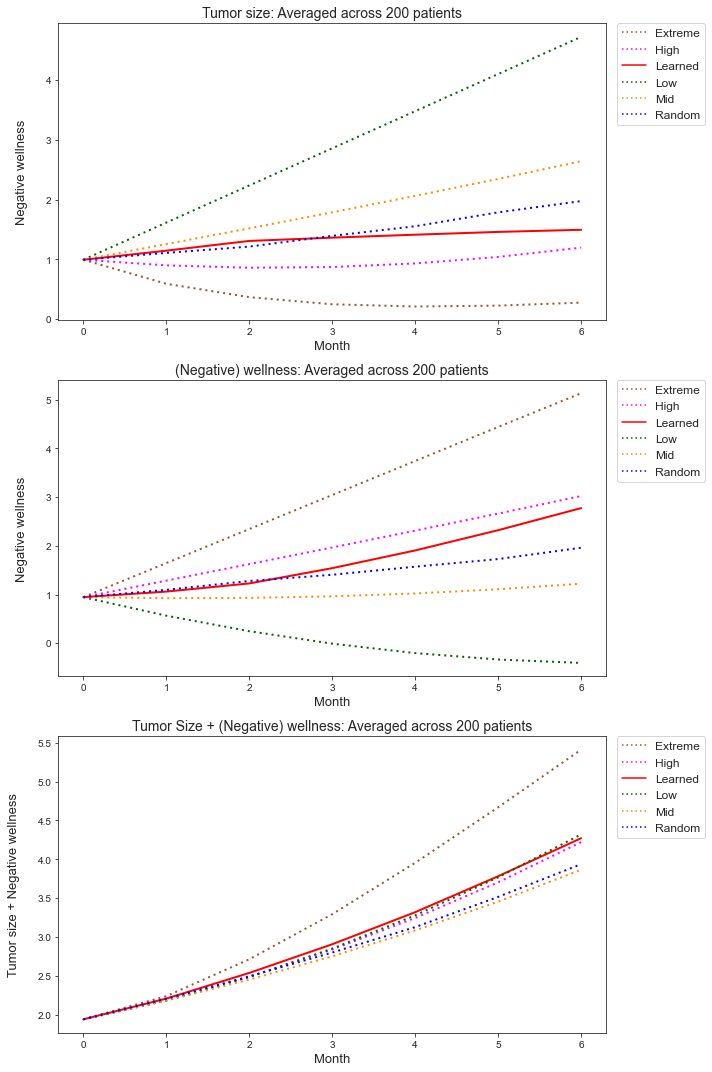


Policy Iteration: 8 - Evaluation results:
                         - Avg. ending tumor size : 1.4951361547940492
                         - Avg. max. toxicity : 6.216190941484877
                         - Avg. prob. of death : 0.7237876797831049



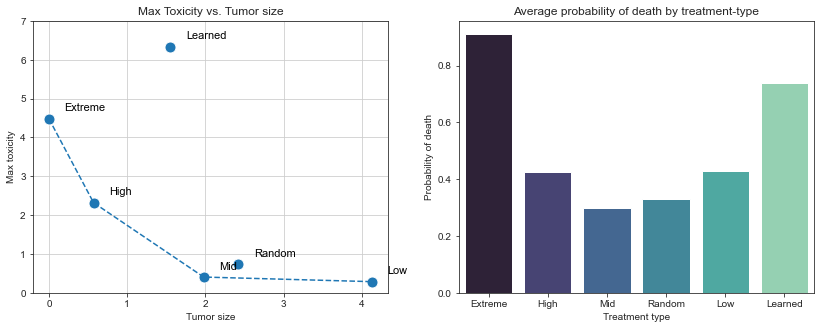

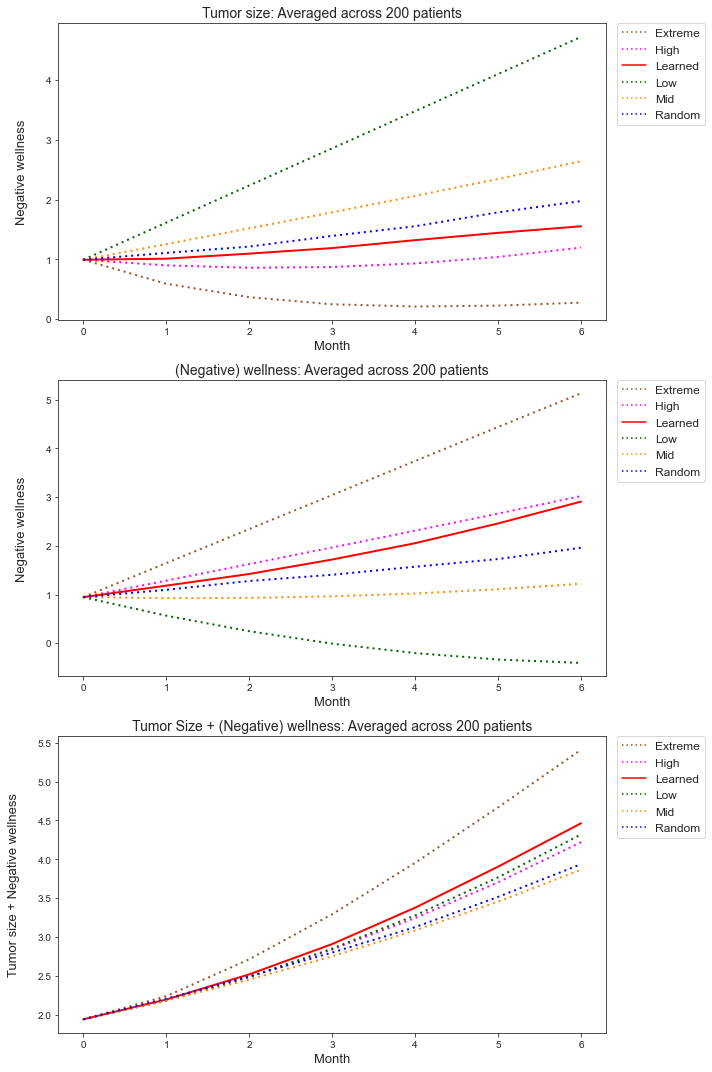


Policy Iteration: 9 - Evaluation results:
                         - Avg. ending tumor size : 1.553598029051701
                         - Avg. max. toxicity : 6.331092919248
                         - Avg. prob. of death : 0.7399427062246137



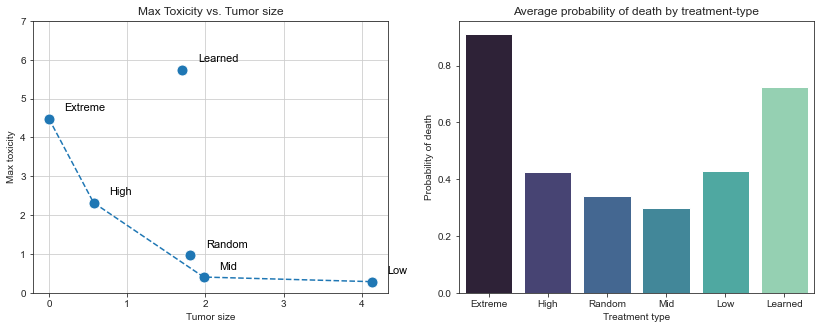

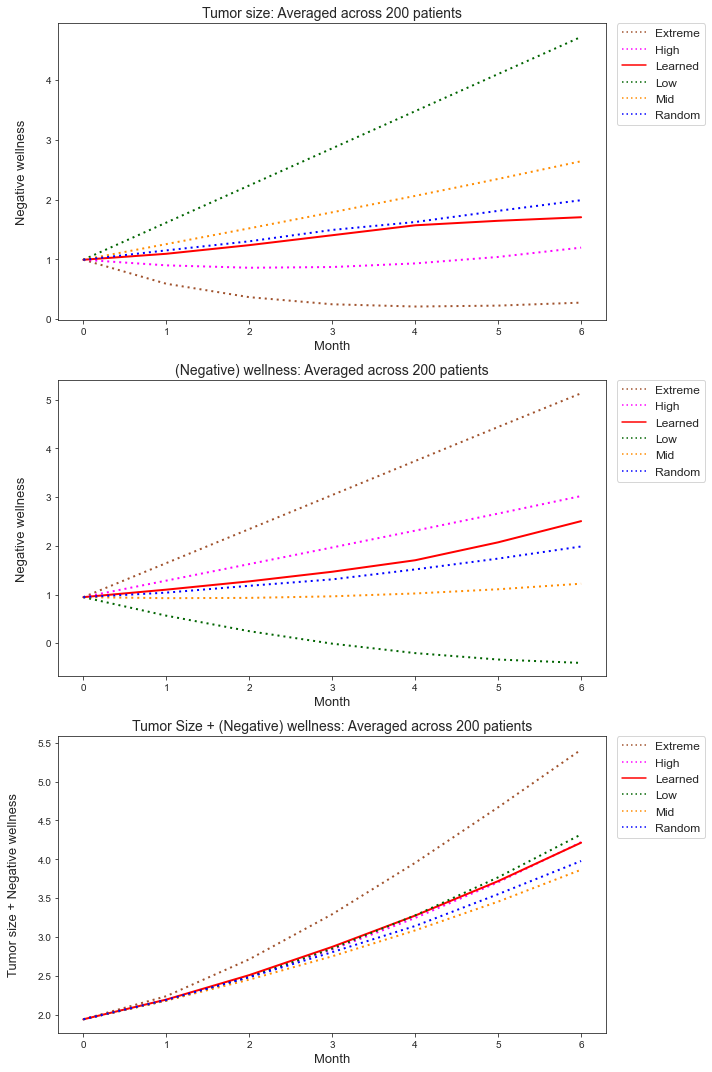


Evaluations: 100%|██████████| 1/1 [1:26:10<00:00, 5170.54s/it]
Policy Iteration: 10 - Evaluation results:
                         - Avg. ending tumor size : 1.7052398294184798
                         - Avg. max. toxicity : 5.745721924497454
                         - Avg. prob. of death : 0.725352243900499




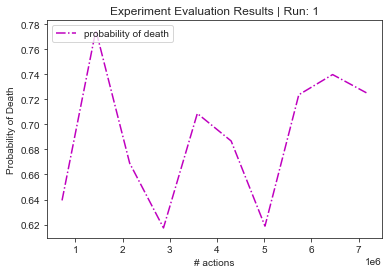

In [6]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                #, init_state_path            = configs['init_state_path'] # Use a pre-designed init state configs   
                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 6
                                                , treatment_length_eval     = 6

                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show SR vs. action no. plot of exp. run

                                                , set_seed = 16
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

---
### Lengthier treatment regime

#### Original algorithm

In [3]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 1
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          #, 'init_state_path': './manual_init_state_input/uniformly_sampled_states.csv'
          }

algorithm = ALGO_TYPE['original']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 16


Currently evaluated configs:
 Samples: 1000 | Actions: 6 | Roll-outs: 10 | Significance: 0.1


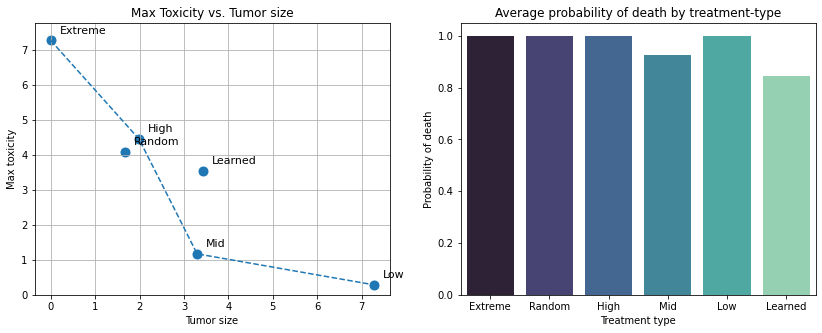

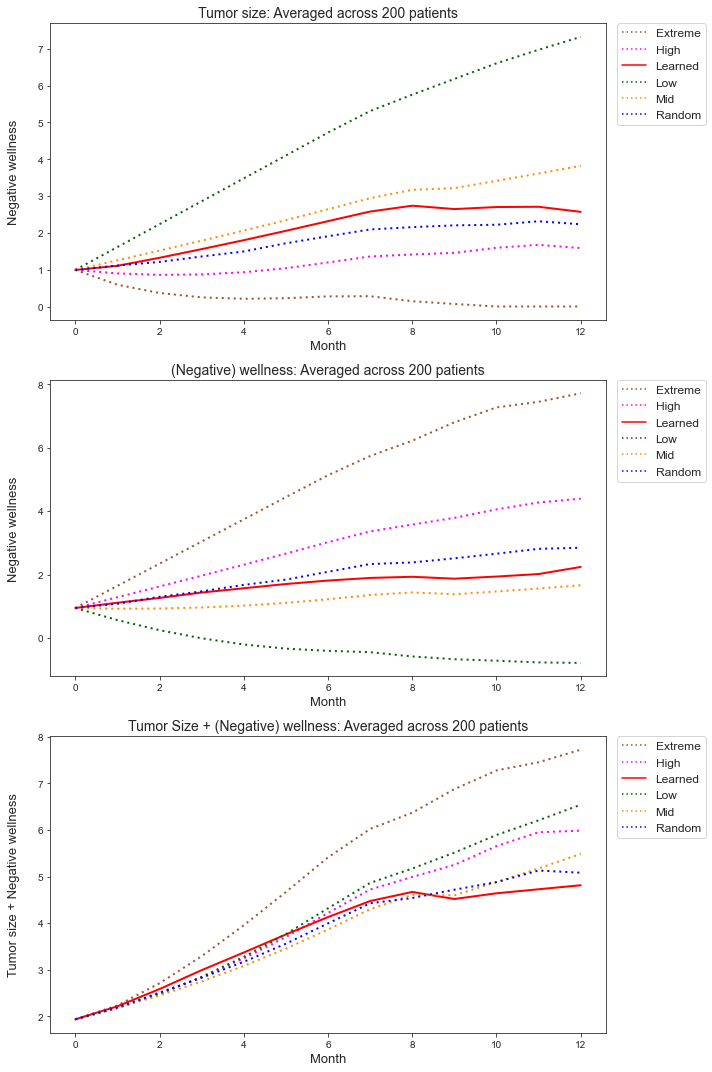


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : 3.4247475023924507
                         - Avg. max. toxicity : 3.5431332843256462
                         - Avg. prob. of death : 0.8468663397104927



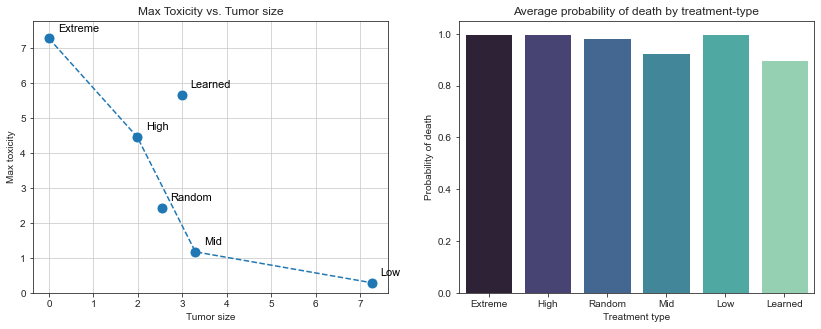

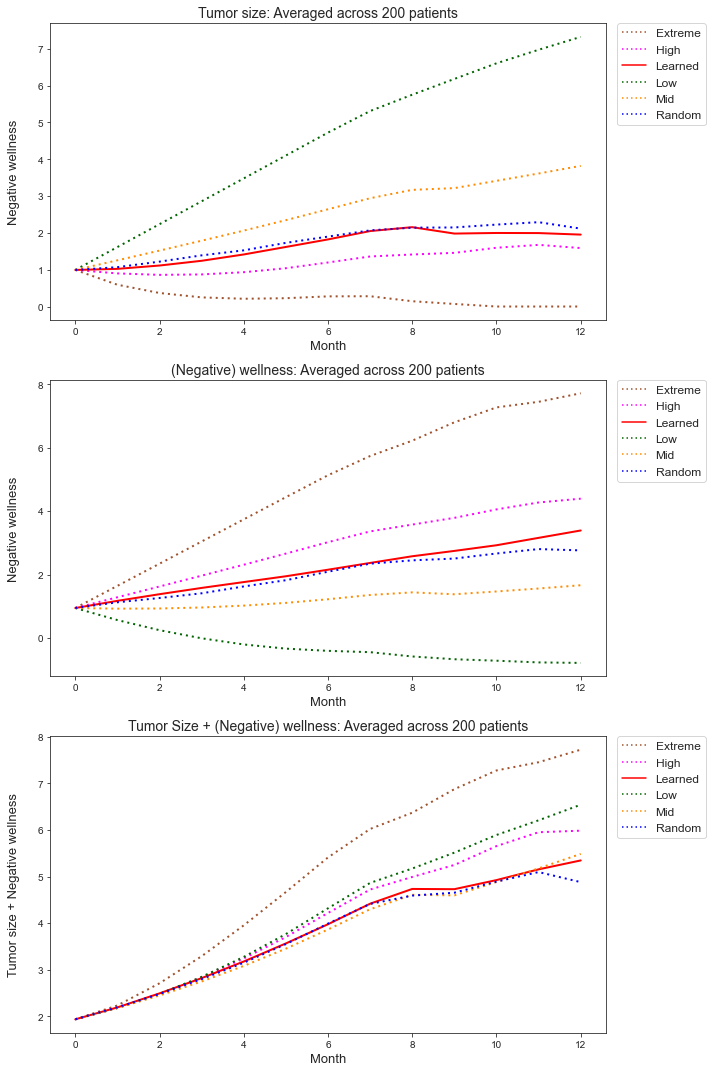


Policy Iteration: 2 - Evaluation results:
                         - Avg. ending tumor size : 2.9893161783164235
                         - Avg. max. toxicity : 5.671334430524264
                         - Avg. prob. of death : 0.9008848208150142



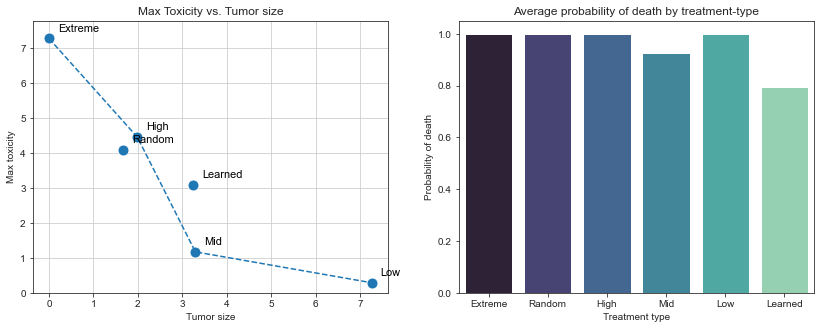

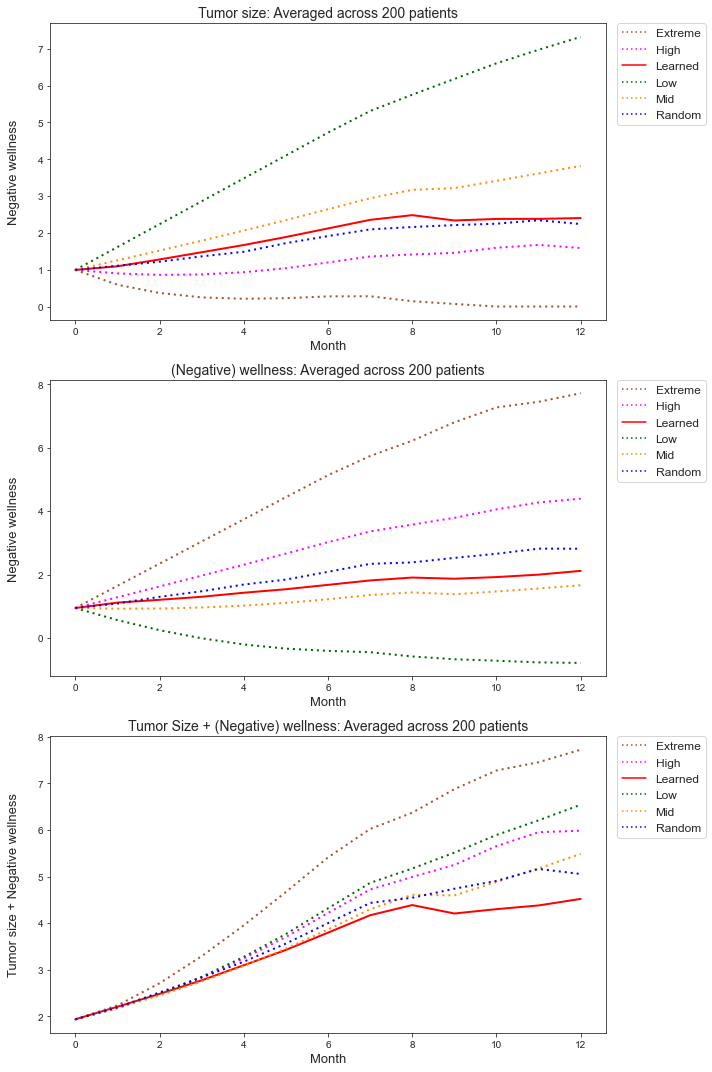


Policy Iteration: 3 - Evaluation results:
                         - Avg. ending tumor size : 3.2482579134954452
                         - Avg. max. toxicity : 3.097196074515709
                         - Avg. prob. of death : 0.7933557424758564



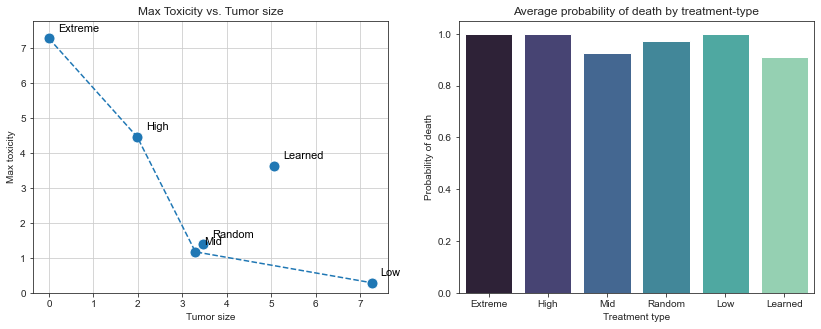

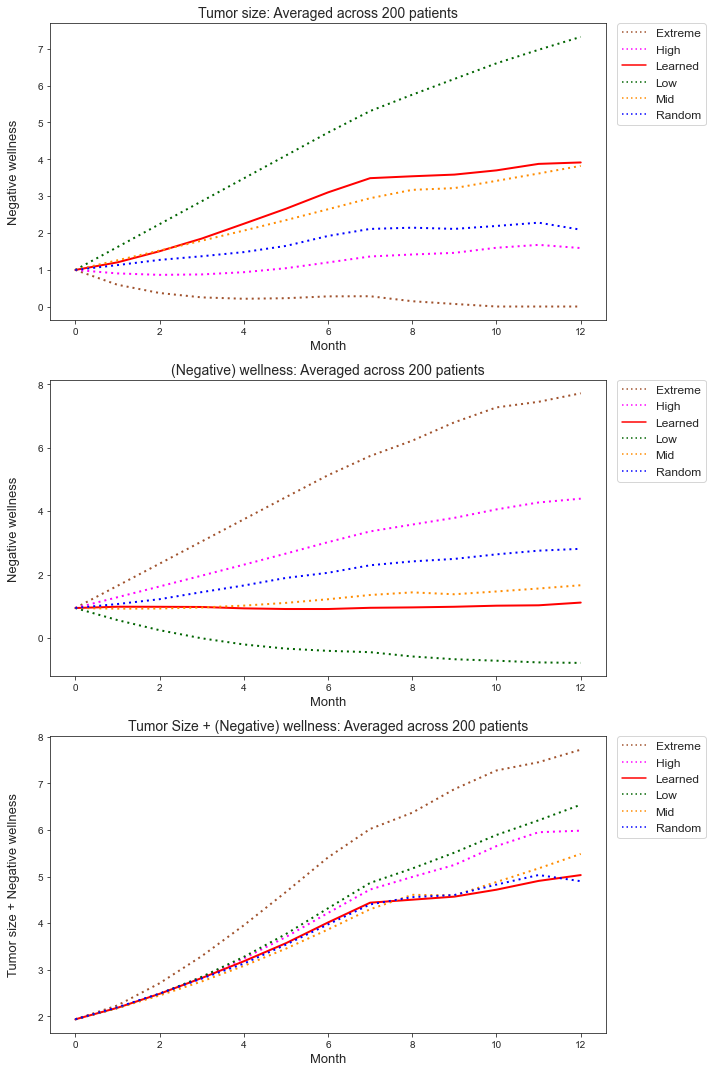


Policy Iteration: 4 - Evaluation results:
                         - Avg. ending tumor size : 5.063558947560906
                         - Avg. max. toxicity : 3.6320217945491784
                         - Avg. prob. of death : 0.9096839072631048



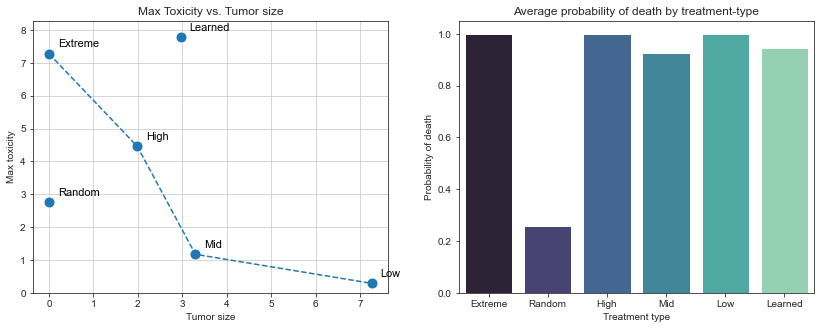

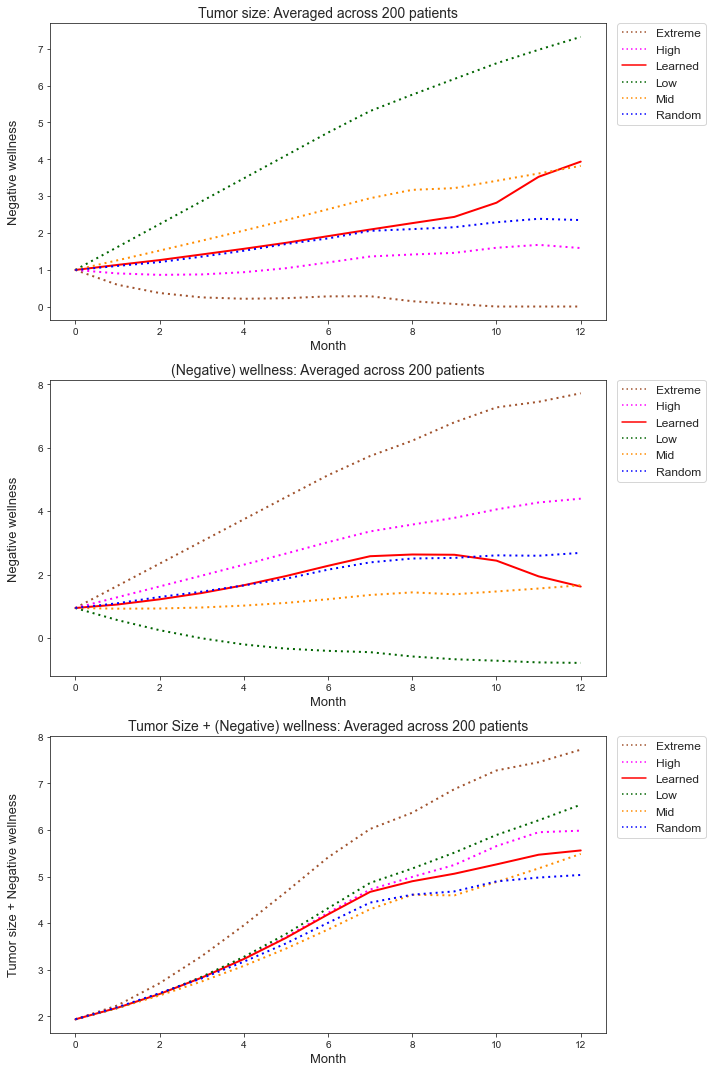


Policy Iteration: 5 - Evaluation results:
                         - Avg. ending tumor size : 2.967601949083266
                         - Avg. max. toxicity : 7.771980140996584
                         - Avg. prob. of death : 0.9462200969395483



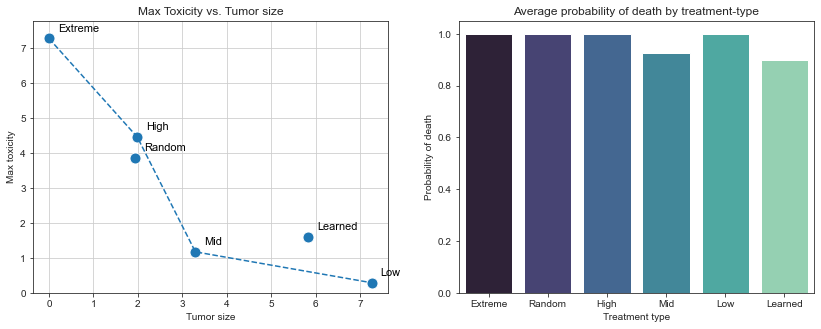

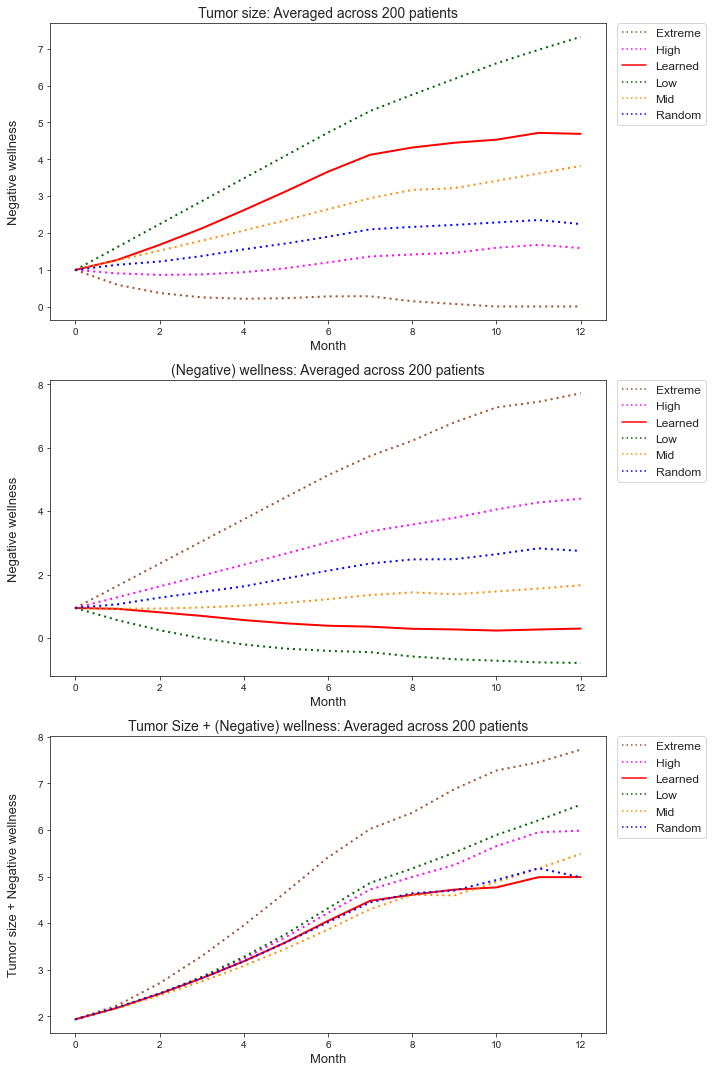


Policy Iteration: 6 - Evaluation results:
                         - Avg. ending tumor size : 5.829088420400995
                         - Avg. max. toxicity : 1.5902833049797116
                         - Avg. prob. of death : 0.8982906331932693



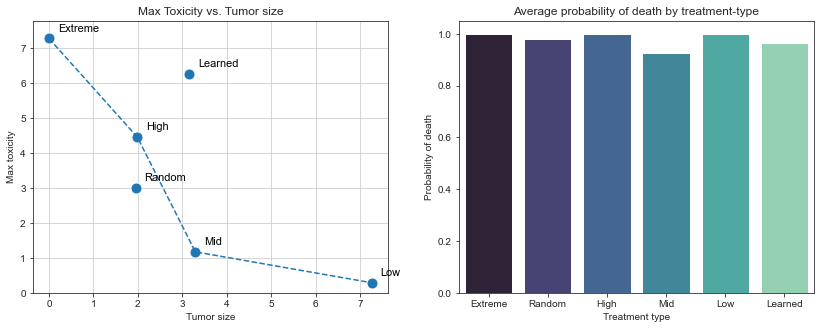

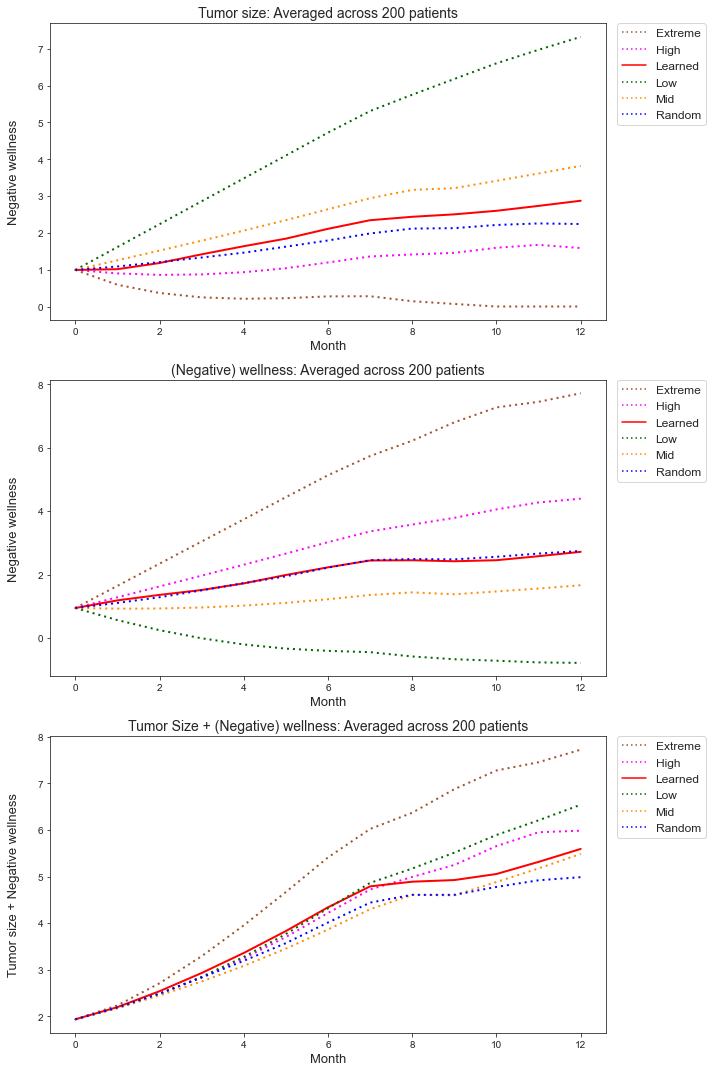


Policy Iteration: 7 - Evaluation results:
                         - Avg. ending tumor size : 3.1609328490545887
                         - Avg. max. toxicity : 6.262369901795527
                         - Avg. prob. of death : 0.9661683313697328

Runs:   0%|          | 0/1 [2:25:48<?, ?it/s]


KeyboardInterrupt: 

In [4]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                #, init_state_path            = configs['init_state_path'] # Use a pre-designed init state configs   
                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 6
                                                , treatment_length_eval     = 12

                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show SR vs. action no. plot of exp. run

                                                , set_seed = 16
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

#### Modified algorithm

In [ ]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 1
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          #, 'init_state_path': './manual_init_state_input/uniformly_sampled_states.csv'
          }

algorithm = ALGO_TYPE['modified']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

In [ ]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                #, init_state_path            = configs['init_state_path'] # Use a pre-designed init state configs   
                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 6
                                                , treatment_length_eval     = 12

                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show SR vs. action no. plot of exp. run

                                                , set_seed = 16
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

In [59]:
# # Save the evaluation results
# results_dfs = []
# for result in agg_results:
#     results_dfs.append(pd.DataFrame(result))

# results_df = pd.concat(results_dfs)

# results_df.to_excel(f"eval_results/{ALGO_NAME}_experiment_results_para_config_{configs['CONFIG_NO']}.xlsx", index=False)